In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
# Dense adalah nama lain dari hidden layer kalau di keras

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [15]:
plt.style.use('seaborn-v0_8')

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
df = pd.read_csv('./pima_diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## Load Datasets

In [18]:
df_diabetes = pd.read_csv('./pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
# Cek ukuran data

print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


<Axes: xlabel='age', ylabel='Density'>

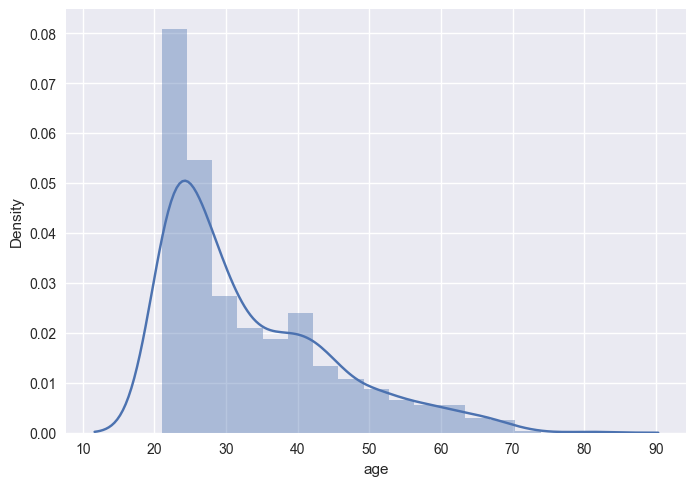

In [20]:
sns.distplot(df_diabetes['age'])

In [21]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Split Datasets

In [22]:
features = df_diabetes.values[:,:8]
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [23]:
labels = df_diabetes.values[:,8:]
labels

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)

In [25]:
X_train.shape

(614, 8)

In [35]:
y_train.shape

(614, 1)

## Define Model

In [26]:
# define the keras sequential model
model = Sequential()

In [27]:
# Artificial Neural Network / Multi-layer Perceptron / Fully Connected Neural Network

# Convolutional Neural Network -> data gambar

# Long-Short Term Memory Neural Network -> data squentian atau data teks

# Dll...


In [ ]:
# lihat di neural network 

model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
# input_dim = 8 karena ada 8 fitur (input_dim adalah layer input)

model.add(Dense(8, activation='relu')) # 2nd hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer
# pakai sigmoid karena outputnya/targetnya 0 atau 1 (binary classification)

**Question:** Arsitektur di atas termasuk MLP atau perceptron?

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

optmizer **Adam**


## Train Model

In [36]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=250, batch_size=2)

Epoch 1/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7789 - loss: 0.4760
Epoch 2/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7462 - loss: 0.4963
Epoch 3/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8131 - loss: 0.4455
Epoch 4/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7745 - loss: 0.4386
Epoch 5/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.7675 - loss: 0.5028
Epoch 6/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8130 - loss: 0.4164
Epoch 7/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.7647 - loss: 0.5034
Epoch 8/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8093 - loss: 0.4439
Epoch 9/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.7894 - loss: 0.4416
Epoch 10/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.7947 - loss: 0.4404
Epoch 11/250
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.7587 - loss: 0.4760
Epoch 12/250
307/307 ━━━━━━

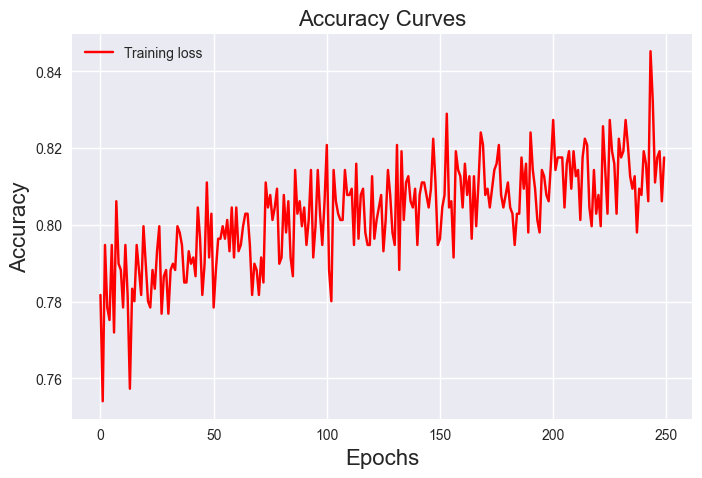

In [37]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')  # history.history digunakan untuk mengakses hasil training
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

## Evaluate Model

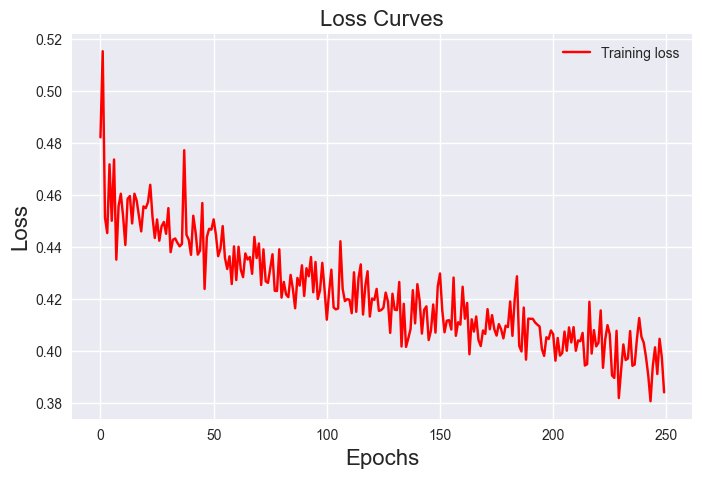

In [38]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['loss'], 'r')  # history.history digunakan untuk mengakses hasil training
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

In [39]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 66.88


---